### For reference
import sys
sys.path.insert(1, r'C:\Users\nishant\Python Practice\Rough')

from chatgpt import gpt, ask

In [2]:
from skimage.io import imread,imsave
import os
import numpy as np

## Speficify your folder path here and run all codes

In [4]:
#Write folder path here where you have saved your original images
folder_path = r"C:\Users\nishant\OneDrive - IIT Hyderabad\Desktop\PLACEMENT PREPARE\IIT Admission\IIT Hyderabad\Polymer and Bio-systems\Thesis\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data"
#Write the path in which you want to save your cropped images
path = r"C:\Users\nishant\OneDrive - IIT Hyderabad\Desktop\PLACEMENT PREPARE\IIT Admission\IIT Hyderabad\Polymer and Bio-systems\Thesis\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped Images"








#This code is searching for all png and jpg images in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.png')]

image_files.sort(key = lambda image: (image.split('.')[0]))

images = []

#this code saves all the found jpg or png image in images numpy array
for img in image_files:
    im = imread(os.path.join(folder_path, img))
    images.append(im)
images = np.array(images)    
    
print(image_files)

['BG.tif', 'BG2.tif']


(2, 1920, 2560, 3)


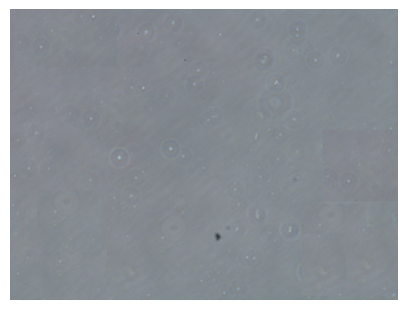

In [5]:
print(images.shape)

num_images,height, width, _ = images.shape

#This is a function to plot the image
import matplotlib.pyplot as plt
def plotimg(img):
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

plotimg(images[0,:,:,:])

In [6]:
import cv2

#This function crops the image and saves to the specified path
def crop_img(images, path, f=2, resize = False, size = (64,64)):
    """
    images is the numpy array that have all the images to be cropped
    s means start, e means end, sc means start of column, ec means end of column
    f is the factor by which you divide your image
    """
    counter = 1
    num_images,height, width, _ = images.shape
    
    for i in range(num_images):
        s = 0
        sc = 0
        ec = 0
        e = int(s + width/f)
        img = images[i,:,:,:]
        for col in range(f):
            s = 0
            sc = ec
            ec = int(sc + (width/f))
            for row in range(f):
                e = int(s + width/f)
                m2 = img[s:e,sc:ec,:]
                img_name = f'{i}_{counter}.jpg'
                #This command saves the image in the given path
                if resize ==True:
                    m2 = cv2.resize(m2, size)
                imsave(os.path.join(path, img_name), m2)
                s = e
                counter += 1


In [7]:
crop_img(images, path, 30, resize=False, size=(64,64))

C:\Users\nishant\AppData\Local\Temp\ipykernel_11848\1425730161.py:30: UserWarning: C:\Users\nishant\OneDrive - IIT Hyderabad\Desktop\PLACEMENT PREPARE\IIT Admission\IIT Hyderabad\Polymer and Bio-systems\Thesis\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped Images\0_1.jpg is a low contrast image
  imsave(os.path.join(path, img_name), m2)
C:\Users\nishant\AppData\Local\Temp\ipykernel_11848\1425730161.py:30: UserWarning: C:\Users\nishant\OneDrive - IIT Hyderabad\Desktop\PLACEMENT PREPARE\IIT Admission\IIT Hyderabad\Polymer and Bio-systems\Thesis\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped Images\0_2.jpg is a low contrast image
  imsave(os.path.join(path, img_name), m2)
C:\Users\nishant\AppData\Local\Temp\ipykernel_11848\1425730161.py:30: UserWarning: C:\Users\nishant\OneDrive - IIT Hyderabad\Desktop\PLACEMENT PREPARE\IIT Admission\IIT Hyderabad\Polymer and Bio-systems\Thesis\Python Practice\Thesis\Yolo\datasets\cell\jagadeesh_new_data\Cropped

IndexError: cannot do a non-empty take from an empty axes.

### Crop images without resizing

In [45]:
import cv2
import warnings

#This function crops the image and saves to the specified path
def full_crop(images, path, size = (64,64), resize = False):
    """
    images is the numpy array that have all the images to be cropped
    s means start, e means end, sc means start of column, ec means end of column
    f is the factor by which you divide your image
    """
    counter = 1
    num_images,height, width, _ = images.shape
    
    h = size[0]
    w = size[1]
    
    height_steps = int(width / w)
    
    row_steps = int(height / h)
    
    
    warnings.filterwarnings("ignore", category=UserWarning)
    
    for i in range(num_images):
        s = 0
        sc = 0
        ec = 0 
        e = int(s + h) 
        img = images[i,:,:,:]
        for col in range(height_steps):
            s = 0
            sc = ec
            ec = int(sc + w)
            for row in range(row_steps):
                e = int(s + h)
                m2 = img[s:e,sc:ec,:]
                img_name = f'{i}_{counter}.jpg'
                #This command saves the image in the given path
                if resize ==True:
                    m2 = cv2.resize(m2, size)
                
                
                
                imsave(os.path.join(path, img_name), m2)
                s = e
                counter += 1



In [ ]:
full_crop(images, path, size = (64,64), resize = False)